# Summary

# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data

In [2]:
data = pd.read_csv('data\insurance.csv')

In [3]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data exploration

## Medical factors

<Axes: xlabel='age', ylabel='Count'>

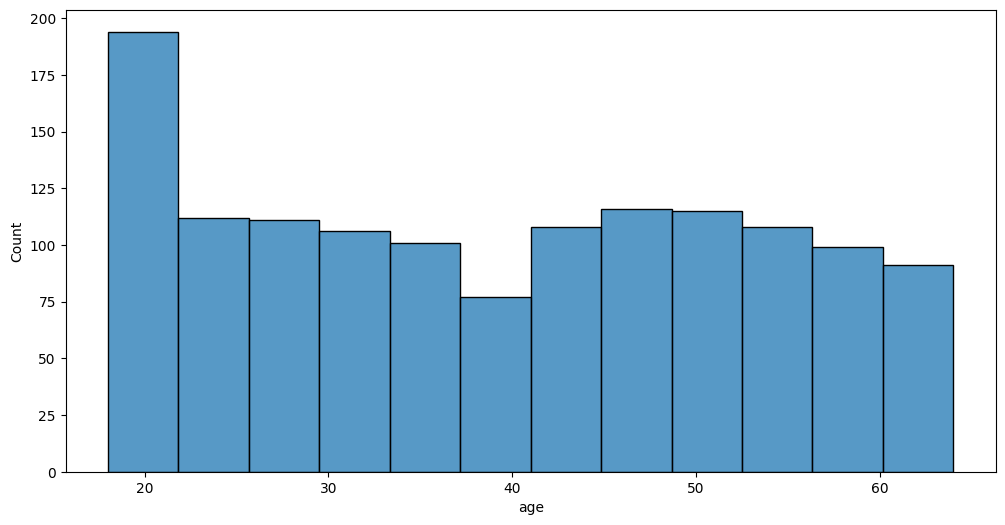

In [4]:
plt.figure(figsize=(12,6))
sns.histplot(data['age'])

<Axes: xlabel='sex', ylabel='Count'>

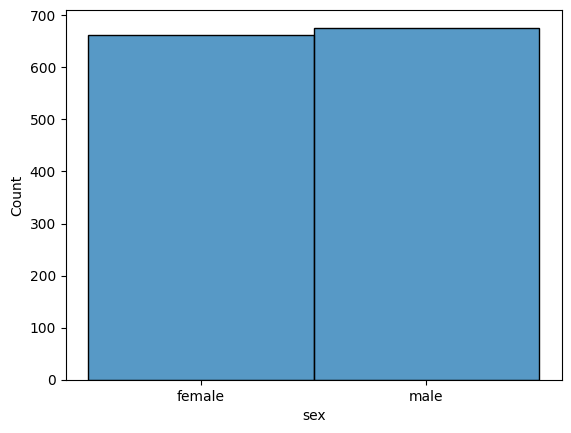

In [5]:
sns.histplot(data['sex'])

<Axes: xlabel='smoker', ylabel='Count'>

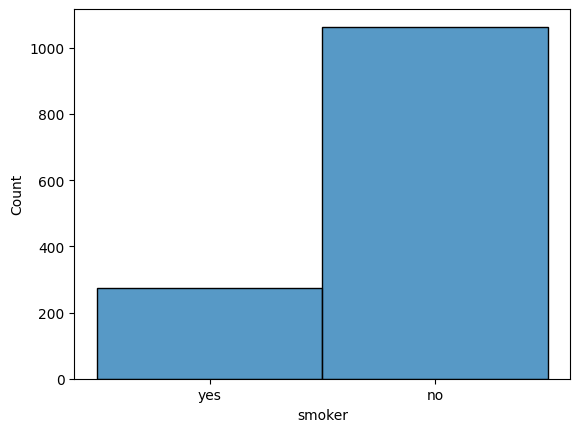

In [6]:
sns.histplot(data['smoker'])

<Axes: xlabel='children', ylabel='Count'>

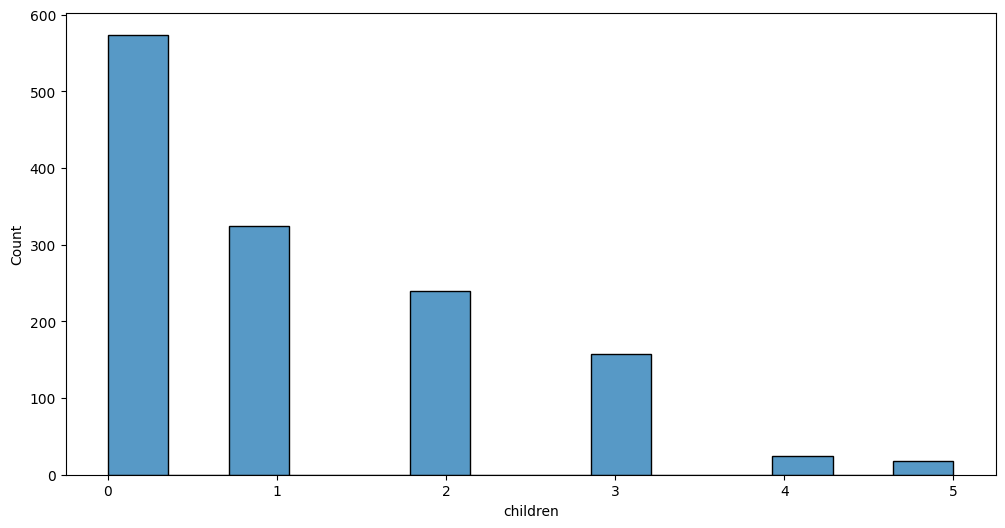

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data['children'])

<Axes: ylabel='bmi'>

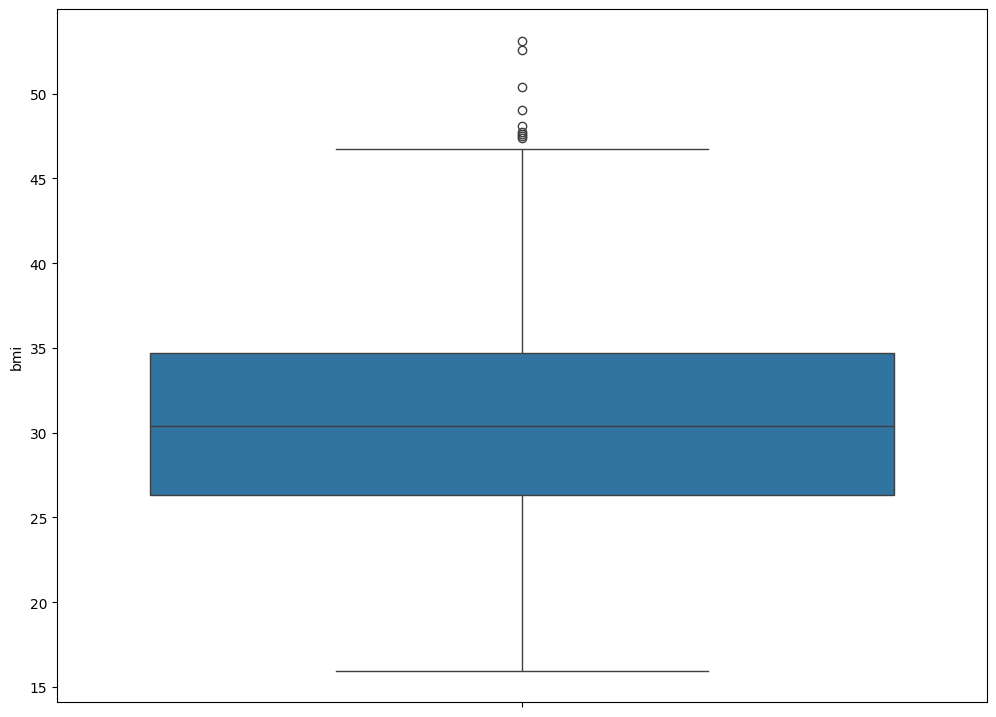

In [8]:
plt.figure(figsize=(12,9))
sns.boxplot(data['bmi'])

## Geo data

<Axes: xlabel='region', ylabel='Count'>

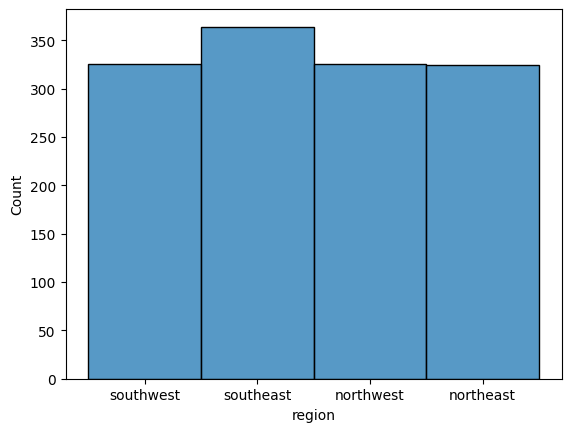

In [9]:
sns.histplot(data['region'])

## Insurance cost overview

<Axes: ylabel='charges'>

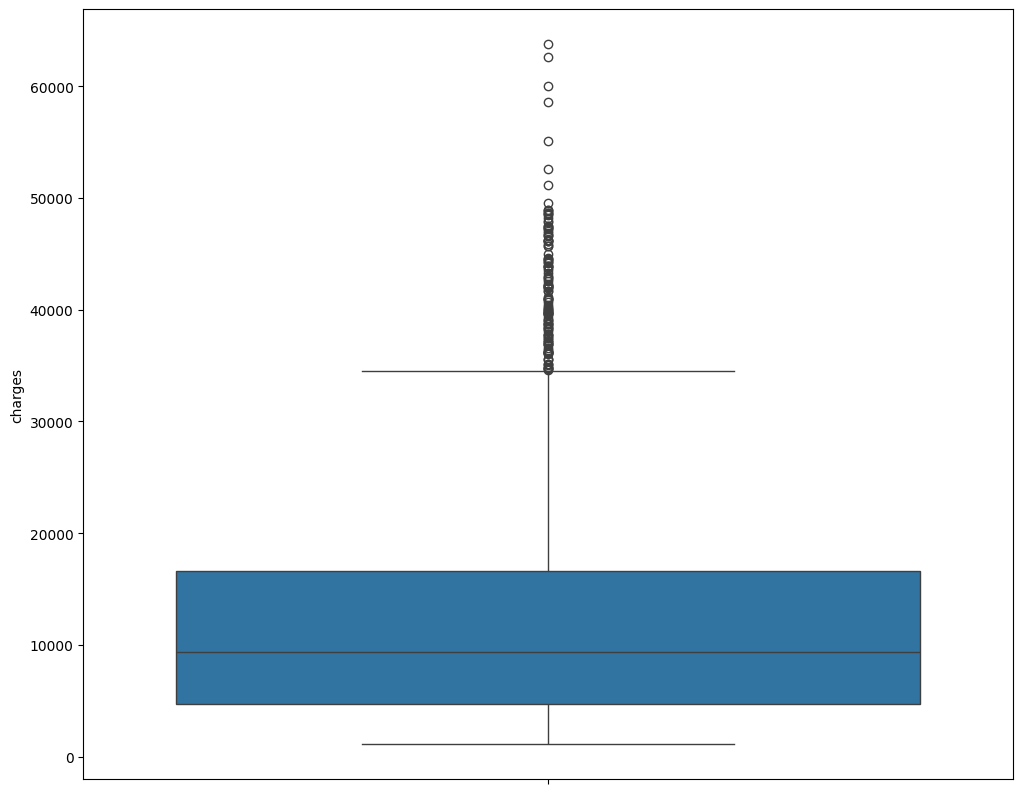

In [10]:
plt.figure(figsize=(12,10))
sns.boxplot(data['charges'])

# Cost factors analysis

## Impact of sex

<Axes: xlabel='sex', ylabel='charges'>

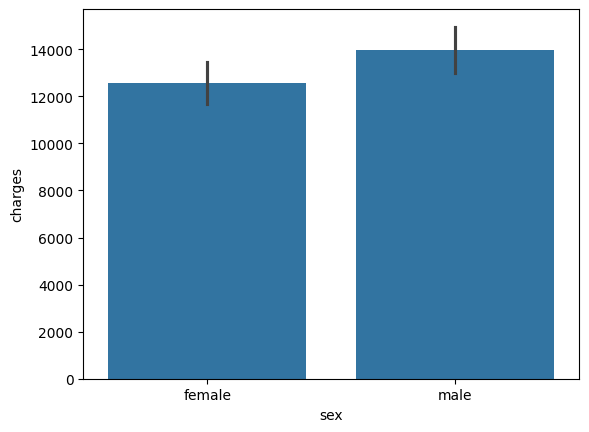

In [11]:
sns.barplot(data,x='sex',y='charges')

## Impact of age

<Axes: xlabel='age', ylabel='charges'>

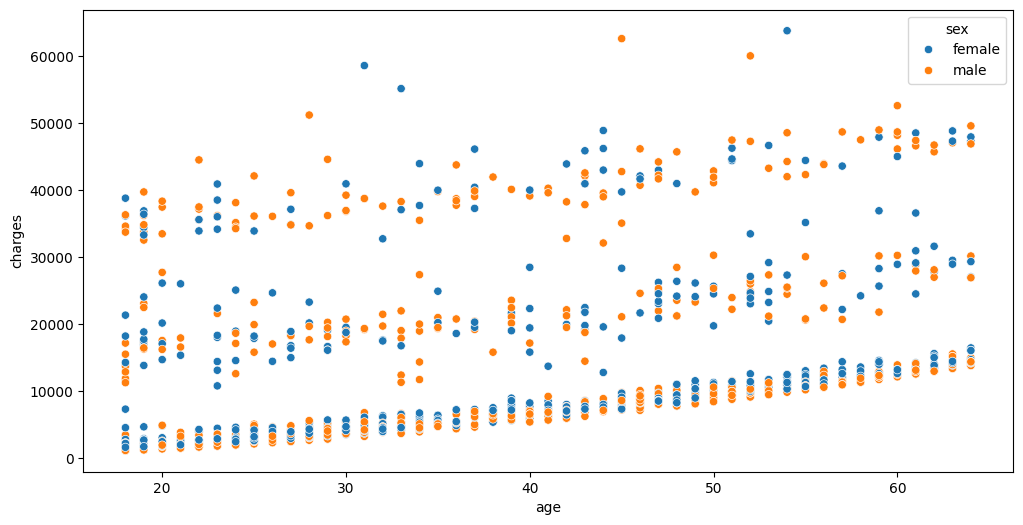

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data,x='age',y='charges',hue='sex')

## Impact of smoking

<Axes: xlabel='smoker', ylabel='charges'>

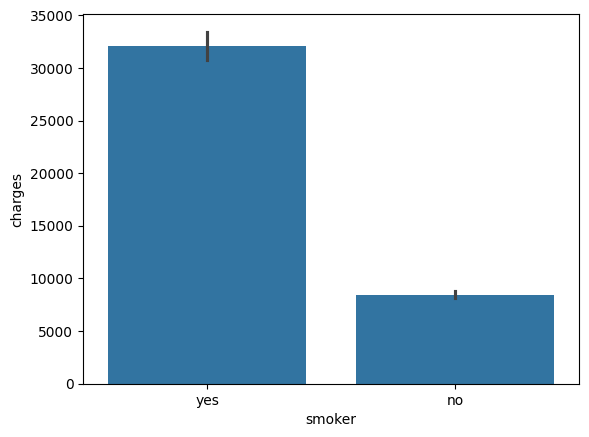

In [13]:
sns.barplot(data,x='smoker',y='charges')

## Impact of bmi

<Axes: xlabel='bmi', ylabel='charges'>

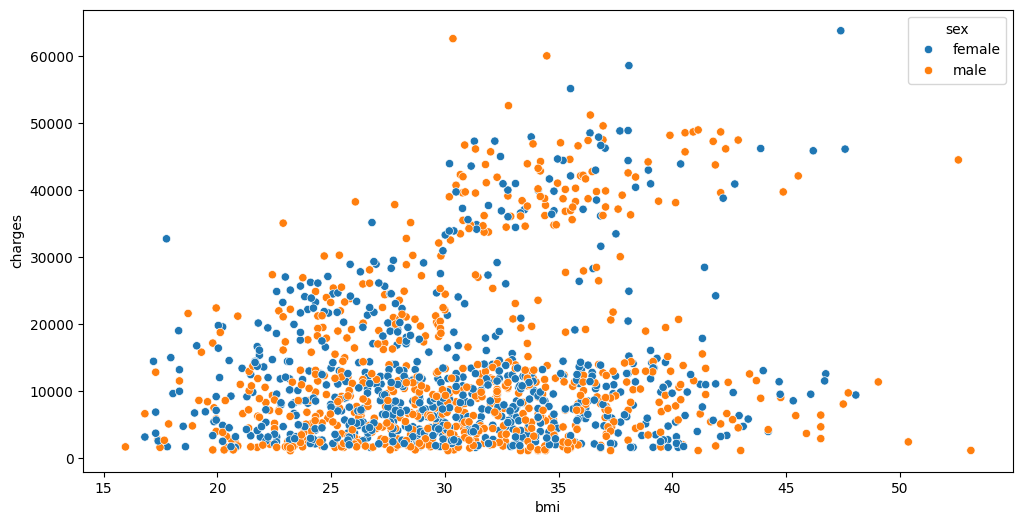

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data,x='bmi',y='charges',hue='sex')

## Impact of children

<Axes: xlabel='children', ylabel='charges'>

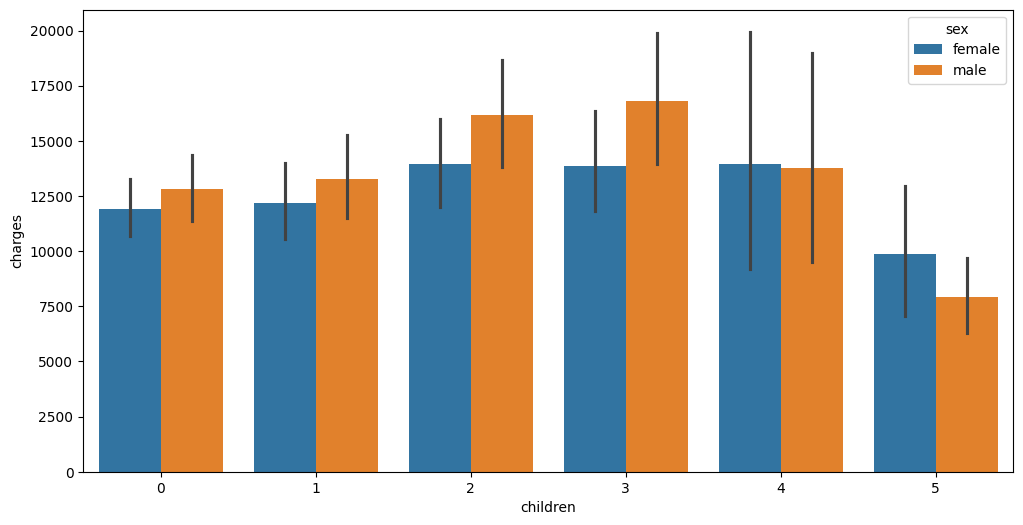

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data,x='children',y='charges',hue='sex')

## Impact of lived-in region

<Axes: xlabel='region', ylabel='charges'>

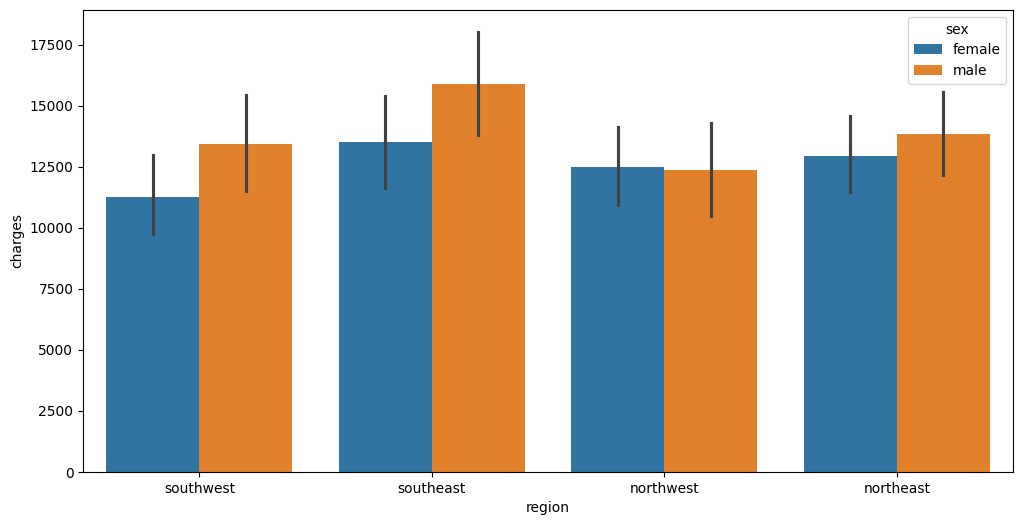

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data,x='region',y='charges',hue='sex')

# Find strongest predictor of insurance cost (strongest correlation)

In [17]:
df = data.copy()
df['sex'] = np.where(df['sex']=='male',0,1)
df['smoker'] = np.where(df['smoker']=='yes',1,0)
df.drop(columns=['region'],inplace=True)
df.rename(columns={'charges':'insurance cost'},inplace=True)

correlation_matrix = df.corr()

In [18]:
# Get the correlation of all columns with the 'insurance cost' column
insurance_cost_correlation = correlation_matrix['insurance cost']

# Find the column with the highest correlation to the 'insurance cost' column, excluding 'insurance cost' itself
strongest_correlation = insurance_cost_correlation.drop(labels=['insurance cost']).idxmax()

# Output the result
strongest_correlation_value = insurance_cost_correlation[strongest_correlation]

print(f"The column with the strongest correlation with the insurance cost is: {strongest_correlation}")
print(f"The correlation value is: {strongest_correlation_value}")

The column with the strongest correlation with the insurance cost is: smoker
The correlation value is: 0.7872514304984763


In [19]:
insurance_cost_correlation

age               0.299008
sex              -0.057292
bmi               0.198341
children          0.067998
smoker            0.787251
insurance cost    1.000000
Name: insurance cost, dtype: float64

# Train a model

In [20]:
# Define features and target variable
X = df.drop('insurance cost', axis=1)
y = df['insurance cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear regression model

In [21]:
# Create a pipeline with preprocessing and the model
model_pipeline = Pipeline(steps=[
    ('model', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MAE: {mae}')
print(f'Linear Regression MSE: {mse}')

Linear Regression MAE: 4213.484797807139
Linear Regression MSE: 33979257.05080821


## Random forest model

In [22]:
# Create a pipeline with preprocessing and the model
model_pipeline_rf = Pipeline(steps=[
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_pipeline_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regressor MAE: {mae_rf}')
print(f'Random Forest Regressor MSE: {mse_rf}')

Random Forest Regressor MAE: 2559.113482599788
Random Forest Regressor MSE: 22146196.420976512


Random forest model is much more accurate

In [25]:
joblib_file = "models/random_forest_model.joblib"
joblib.dump(model_pipeline_rf, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to models/random_forest_model.joblib


# Test model with dummy values

In [30]:
new_data = {
    'age': [29, 50], 
    'sex': [1, 0], 
    'bmi': [26.2, 31.4],
    'children': [0, 2], 
    'smoker': [0, 1]
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Predict on the new data using the loaded model
predictions = model_pipeline_rf.predict(new_df)
print("Predictions:", predictions)

Predictions: [ 3633.239946  41501.7560145]


# Environment

In [31]:
%pip list

Package           Version
----------------- -----------
asttokens         2.4.1
colorama          0.4.6
comm              0.2.2
contourpy         1.2.1
cycler            0.12.1
debugpy           1.8.2
decorator         5.1.1
executing         2.0.1
fonttools         4.53.0
ipykernel         6.29.5
ipython           8.26.0
jedi              0.19.1
joblib            1.4.2
jupyter_client    8.6.2
jupyter_core      5.7.2
kiwisolver        1.4.5
matplotlib        3.9.0
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             2.0.0
packaging         24.1
pandas            2.2.2
parso             0.8.4
patsy             0.5.6
pillow            10.4.0
pip               24.1.1
platformdirs      4.2.2
plotly            5.22.0
plotly-express    0.4.1
prompt_toolkit    3.0.47
psutil            6.0.0
pure-eval         0.2.2
Pygments          2.18.0
pyparsing         3.1.2
python-dateutil   2.9.0.post0
pytz              2024.1
pywin32           306
pyzmq             26.0.3
scikit-learn     